In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
from useful_functions_with_batch import *
from opt_function_with_batch import *
from opt_function import *
from network_utils import *
import matplotlib.pyplot as plt

In [62]:
def get_bad_mat(n=30,p=0.1,show_graph=0,seed=42,verbose=1):
    # 生成稀疏随机矩阵，保证强连通
    M = np.zeros((n, n))
    cnt=0
    np.random.seed(seed)
    while not nx.is_strongly_connected(nx.DiGraph(M)):
        M = np.random.choice([0, 1], size=(n, n), p=[1-p, p])
        cnt=cnt+1
        if cnt>1000000:
            raise Exception("1000000次都没找到合适的矩阵")
    if verbose==1:
        print('用了'+str(cnt)+'次找到')
    # 归一化每列元素，使得每列元素之和为1
    col_sums = np.sum(M, axis=0)
    M = M / col_sums

    # 将矩阵转换成有向图，并绘制出该图
    if show_graph==1:
        G = nx.DiGraph(M)
        nx.draw(G, with_labels=True)
        plt.show()
        diameter = nx.algorithms.distance_measures.diameter(G)
        print(f"图的直径为{diameter}")
    return M

用了6757次找到


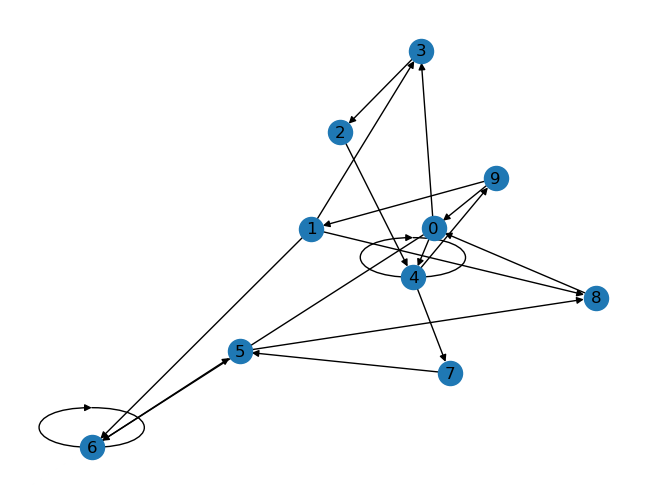

图的直径为6
A的第二大特征值: 0.7873315961713219
A的beta: 0.9999999999999998
A的spectral gap: 2.220446049250313e-16
A的kappa: 14.999999999999943
S_A是: 1.056173764517933e+17 



In [65]:
A = get_bad_mat(n=10, p=0.1, show_graph=1, seed=42, verbose=1).T
show_row(A)

In [51]:
def get_xinmeng_matrix(n=5):
    M = np.zeros((n, n))

    # 主对角线上的元素
    M[np.diag_indices(n)] = 1 / 3 * np.ones(n)
    M[n - 1, n - 1] = M[n - 1, n - 1] + 1 / 3

    # 次对角线上的元素
    for i in range(n - 1):
        M[i + 1, i] = M[i + 1, i] + 1 / 3

    # 第一行上的元素
    M[0, :] = M[0, :] + 1 / 3

    return M

In [84]:
d=4
L_total=8000
h_global, y_global, x_opt = init_global_data(d=d, L_total=L_total, seed=42)
print("h:",h_global.shape)
print("y:",y_global.shape)

h: (8000, 4)
y: (8000,)


In [86]:
n = 10
A = get_xinmeng_matrix(n).T
show_row(A)

A的第二大特征值: 0.3333333333332895
A的beta: 0.7938912496123449
A的spectral gap: 0.20610875038765508
A的kappa: 256.00000000002655
S_A是: 200.8422095188803 



In [112]:
n=10
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=1)
init_x = init_x_func(n=n, d=d, seed=42)
A= get_xinmeng_matrix(n=n).T
k = 1
A = np.linalg.matrix_power(A, k)
show_row(A)
print("h_tilde:",h_tilde.shape,'\n')
L1 = PullDiag_GT_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=3e-3,
    sigma_n=0,
    max_it=5000,
    batch_size=200,
)

A的第二大特征值: 0.3333333333332895
A的beta: 0.7938912496123449
A的spectral gap: 0.20610875038765508
A的kappa: 256.00000000002655
S_A是: 200.8422095188803 

h_tilde: (10, 800, 4) 



In [114]:
n=10
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=1)
init_x = init_x_func(n=n, d=d, seed=42)
A= get_xinmeng_matrix(n=n).T
k = 2
A = np.linalg.matrix_power(A, k)
show_row(A)
print("h_tilde:",h_tilde.shape,'\n')
L2 = PullDiag_GT_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=4e-3,
    sigma_n=0,
    max_it=5000,
    batch_size=200,
)

A的第二大特征值: 0.1111111111111115
A的beta: 0.6291036681563186
A的spectral gap: 0.3708963318436814
A的kappa: 256.0000000000009
S_A是: 111.60891406841397 

h_tilde: (10, 800, 4) 



In [102]:
n=10
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=1)
init_x = init_x_func(n=n, d=d, seed=42)
A= get_xinmeng_matrix(n=n).T
k = 5
A = np.linalg.matrix_power(A, k)
show_row(A)
print("h_tilde:",h_tilde.shape,'\n')
L3 = PullDiag_GT_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=1e-2,
    sigma_n=0,
    max_it=5000,
    batch_size=200,
)

A的第二大特征值: 0.004115226337448551
A的beta: 0.3070358472793337
A的spectral gap: 0.6929641527206662
A的kappa: 256.0000000000025
S_A是: 59.73662081437838 

h_tilde: (10, 800, 4) 



In [94]:
L3

,gradient_norm_on_full_trainset
0,0.284214
1,0.281015
2,0.280007
3,0.278417
4,0.277606
...,...
4996,0.001449
4997,0.001468
4998,0.001464
4999,0.001465


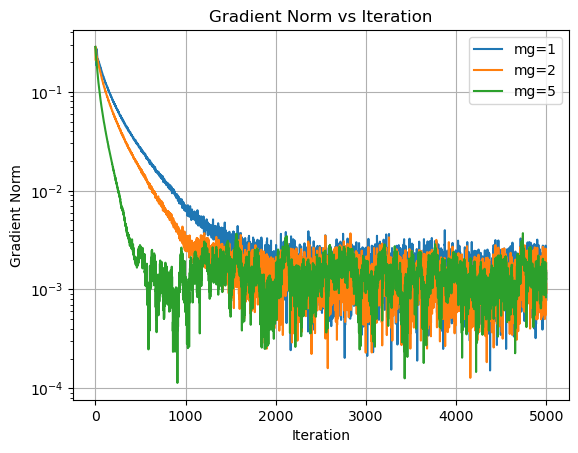

In [117]:
a = "gradient_norm_on_full_trainset"
plt.semilogy(L1[a], label='mg=1')
plt.semilogy(L2[a], label='mg=2')
plt.semilogy(L3[a], label='mg=5')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norm vs Iteration')
plt.grid()
plt.show()

In [185]:
n=10
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=1)
init_x = init_x_func(n=n, d=d, seed=42)
A= get_xinmeng_matrix(n=n).T
k = 1
A = np.linalg.matrix_power(A, k)
show_row(A)
print("h_tilde:",h_tilde.shape,'\n')

L1_list = []

for i in range(50):

    L1 = PullDiag_GT_with_batch(
        A=A,
        init_x=init_x,
        h_data=h_tilde,
        y_data=y_tilde,
        grad_func=grad_with_batch,
        rho=1e-2,
        lr=1e-2,
        sigma_n=0,
        max_it=2000,
        batch_size=200,
    )
    L1_list.append(L1)
    print(i)
L1_avg = pd.DataFrame(
    {col: sum(df[col] for df in L1_list) / len(L1_list) 
     for col in L1_list[0].columns},
    index=L1_list[0].index
)
print(L1_avg)

A的第二大特征值: 0.3333333333332895
A的beta: 0.7938912496123449
A的spectral gap: 0.20610875038765508
A的kappa: 256.00000000002655
S_A是: 200.8422095188803 

h_tilde: (10, 960, 4) 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
      gradient_norm_on_full_trainset
0                           0.281710
1                           0.279442
2                           0.276864
3                           0.273152
4                           0.266412
...                              ...
1996                        0.004362
1997                        0.004691
1998                        0.004496
1999                        0.004628
2000                        0.004004

[2001 rows x 1 columns]


In [119]:
n=10
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=1)
init_x = init_x_func(n=n, d=d, seed=42)
A= get_xinmeng_matrix(n=n).T
k = 2
A = np.linalg.matrix_power(A, k)
show_row(A)
print("h_tilde:",h_tilde.shape,'\n')
L2 = PullDiag_GT_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=1e-2,
    sigma_n=0,
    max_it=5000,
    batch_size=200,
)

A的第二大特征值: 0.1111111111111115
A的beta: 0.6291036681563186
A的spectral gap: 0.3708963318436814
A的kappa: 256.0000000000009
S_A是: 111.60891406841397 

h_tilde: (10, 800, 4) 



In [186]:
n=10
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=1)
init_x = init_x_func(n=n, d=d, seed=42)
A= get_xinmeng_matrix(n=n).T
k = 2
A = np.linalg.matrix_power(A, k)
show_row(A)
print("h_tilde:",h_tilde.shape,'\n')

L2_list = []

for i in range(50):

    L1 = PullDiag_GT_with_batch(
        A=A,
        init_x=init_x,
        h_data=h_tilde,
        y_data=y_tilde,
        grad_func=grad_with_batch,
        rho=1e-2,
        lr=1e-2,
        sigma_n=0,
        max_it=2000,
        batch_size=200,
    )
    L2_list.append(L1)
    print(i)
L2_avg = pd.DataFrame(
    {col: sum(df[col] for df in L2_list) / len(L2_list) 
     for col in L2_list[0].columns},
    index=L2_list[0].index
)
print(L2_avg)

A的第二大特征值: 0.1111111111111115
A的beta: 0.6291036681563186
A的spectral gap: 0.3708963318436814
A的kappa: 256.0000000000009
S_A是: 111.60891406841397 

h_tilde: (10, 960, 4) 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
      gradient_norm_on_full_trainset
0                           0.281710
1                           0.278510
2                           0.274947
3                           0.265627
4                           0.229270
...                              ...
1996                        0.002855
1997                        0.003079
1998                        0.002873
1999                        0.002948
2000                        0.002804

[2001 rows x 1 columns]


In [120]:
n=10
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=1)
init_x = init_x_func(n=n, d=d, seed=42)
A= get_xinmeng_matrix(n=n).T
k = 5
A = np.linalg.matrix_power(A, k)
show_row(A)
print("h_tilde:",h_tilde.shape,'\n')
L3 = PullDiag_GT_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=1e-2,
    sigma_n=0,
    max_it=5000,
    batch_size=200,
)

A的第二大特征值: 0.004115226337448551
A的beta: 0.3070358472793337
A的spectral gap: 0.6929641527206662
A的kappa: 256.0000000000025
S_A是: 59.73662081437838 

h_tilde: (10, 800, 4) 



In [187]:
n=10
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=1)
init_x = init_x_func(n=n, d=d, seed=42)
A= get_xinmeng_matrix(n=n).T
k = 5
A = np.linalg.matrix_power(A, k)
show_row(A)
print("h_tilde:",h_tilde.shape,'\n')

L3_list = []

for i in range(50):

    L1 = PullDiag_GT_with_batch(
        A=A,
        init_x=init_x,
        h_data=h_tilde,
        y_data=y_tilde,
        grad_func=grad_with_batch,
        rho=1e-2,
        lr=1e-2,
        sigma_n=0,
        max_it=2000,
        batch_size=200,
    )
    L3_list.append(L1)
    print(i)
L3_avg = pd.DataFrame(
    {col: sum(df[col] for df in L3_list) / len(L3_list) 
     for col in L3_list[0].columns},
    index=L3_list[0].index
)
print(L3_avg)

A的第二大特征值: 0.004115226337448551
A的beta: 0.3070358472793337
A的spectral gap: 0.6929641527206662
A的kappa: 256.0000000000025
S_A是: 59.73662081437838 

h_tilde: (10, 960, 4) 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
      gradient_norm_on_full_trainset
0                           0.281710
1                           0.277891
2                           0.267217
3                           0.251371
4                           0.243966
...                              ...
1996                        0.001346
1997                        0.001362
1998                        0.001316
1999                        0.001356
2000                        0.001333

[2001 rows x 1 columns]


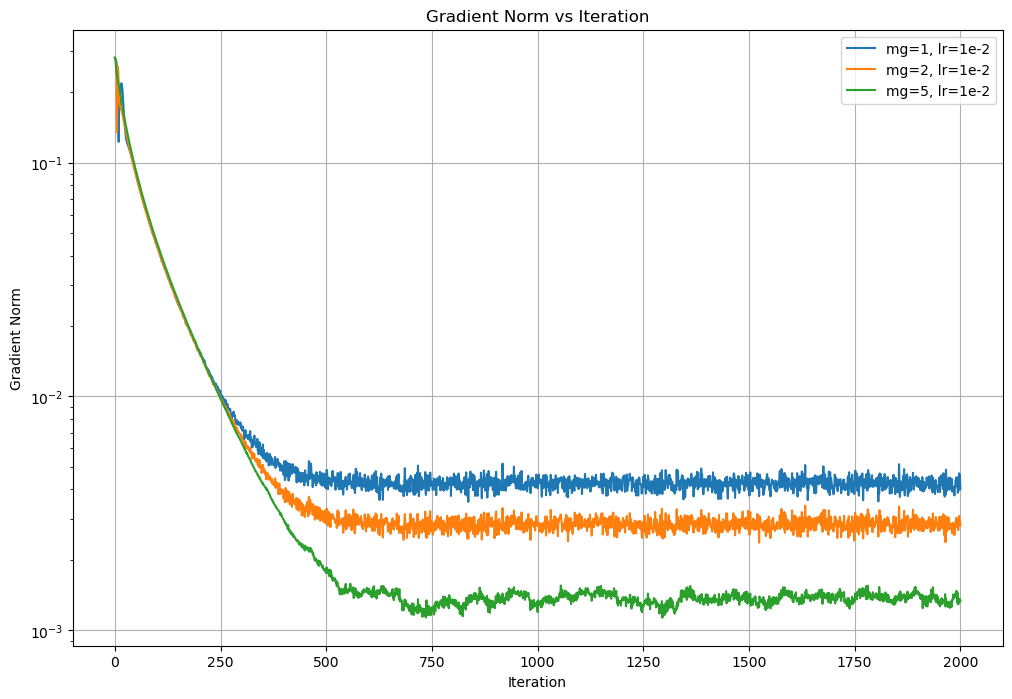

In [188]:
a = "gradient_norm_on_full_trainset"
plt.semilogy(L1_avg[a], label='mg=1, lr=1e-2')
plt.semilogy(L2_avg[a], label='mg=2, lr=1e-2')
plt.semilogy(L3_avg[a], label='mg=5, lr=1e-2')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norm vs Iteration')
plt.grid()
plt.show()

In [278]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

def prettyshow(grads, legend, save='image.pdf', ylabel='Gradient Norm'):
    plt.rcParams['figure.figsize'] = 12, 8
    
    plt.figure()
    xlen = len(grads[0])
    colors = ['green', 'red', 'blue', 'orange', 'purple', 'brown']
    markers = ['d', '^', 'o', '<', '*', 's']
    idx_set = np.arange(0, xlen, xlen//10)
    
    for i in range(len(grads)):
        plt.semilogy(0, grads[i][0], color=colors[i], marker=markers[i], markersize=8)
    
    for i in range(len(grads)):
        for idx in idx_set:
            plt.semilogy(idx, grads[i][idx], color=colors[i], marker=markers[i], markersize=15, linestyle='None')
    
    for i in range(len(grads)):
        plt.semilogy(np.arange(xlen), grads[i], linewidth=4, color=colors[i])
    
    # 设置图例为2行3列，并放置在右上角
    plt.legend(legend, prop={'size': 30, 'weight': 'bold'}, loc='upper left', 
               bbox_to_anchor=(0.05, 1), ncol=1)
    
    plt.xlabel('Comm. Rounds', fontsize=40, fontweight='bold')
    plt.ylabel(ylabel, fontsize=40, fontweight='bold')
    
    # 设置科学记数法格式
    ax = plt.gca()
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(False)
    formatter.set_powerlimits((3, 6))  # 当数值超过1e3或1e6时使用科学记数法
    ax.xaxis.set_major_formatter(formatter)
    
    # 自定义x_tick显示，将数值除以100
    def format_x_tick(x, pos):
        return f'{x/1:.0f}'
    
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_x_tick))
    
    # 调整刻度数量和间隔
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
    
    # 设置刻度标签和偏移文本的字体
    plt.xticks(fontsize=30, fontweight='bold')
    plt.yticks(fontsize=30, fontweight='bold')
    ax.xaxis.get_offset_text().set_fontsize(25)  # 调整科学记数法指数字体大小
    ax.xaxis.get_offset_text().set_fontweight('bold')
    plt.title("MG Pull-Diag-GT", fontsize=40, fontweight='bold')
    
    plt.grid(True)
    plt.subplots_adjust(left=0.21, bottom=0.15, right=0.75)  # 调整右侧边距以容纳图例
    plt.savefig(save, bbox_inches='tight')
    plt.show()

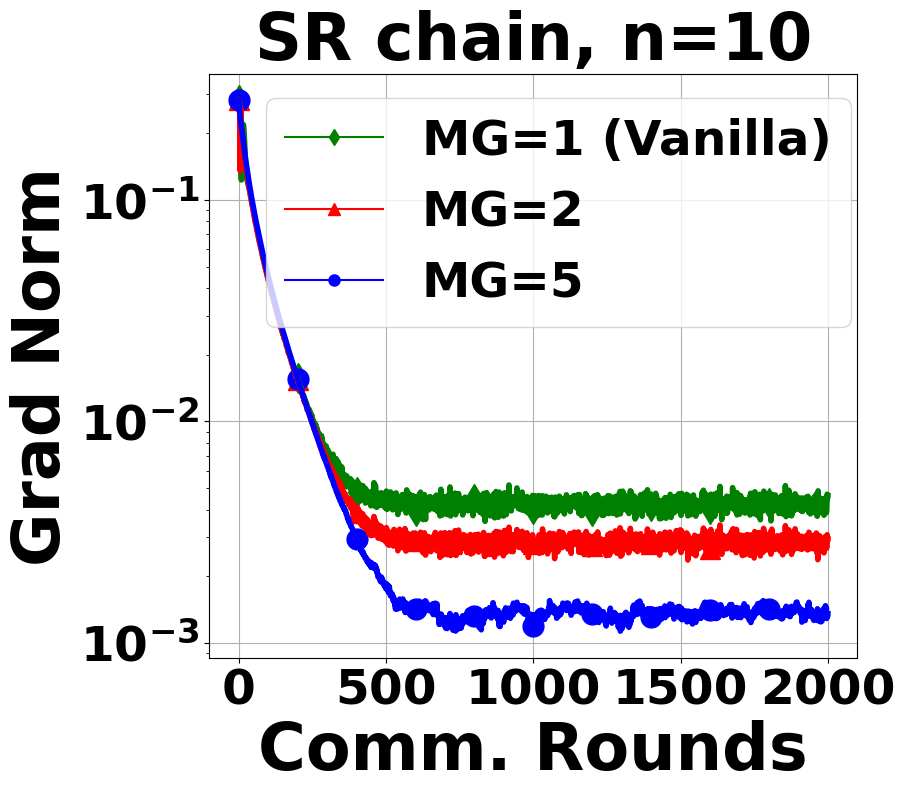

In [190]:
df1 = L1_avg
df2 = L2_avg
df3 = L3_avg

s = 2000

grads = [
    df1["gradient_norm_on_full_trainset"][:s],
    df2["gradient_norm_on_full_trainset"][:s],
    df3["gradient_norm_on_full_trainset"][:s],
    ]
legend = [
    "MG=1 (Vanilla)",
    "MG=2",
    "MG=5",
]

prettyshow(grads, legend, save='/Users/luogan/Code/ICML2025_project/模拟数据/高的kappa下的MG实验/SR_chain_n=10, xinmeng_grad_norm, lr= 1e-2.pdf', ylabel='Grad Norm')

In [168]:
d=4
L_total=800*12
h_global, y_global, x_opt = init_global_data(d=d, L_total=L_total, seed=42)
print("h:",h_global.shape)
print("y:",y_global.shape)

h: (9600, 4)
y: (9600,)


In [169]:
n = 12
A = get_xinmeng_matrix(n).T
show_row(A)

A的第二大特征值: 0.33333333333333337
A的beta: 0.7973538908609501
A的spectral gap: 0.2026461091390499
A的kappa: 1024.000000000183
S_A是: 271.16656134112503 



In [170]:
n=12
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=1)
init_x = init_x_func(n=n, d=d, seed=42)
A= get_xinmeng_matrix(n=n).T
k = 1
A = np.linalg.matrix_power(A, k)
show_row(A)
print("h_tilde:",h_tilde.shape,'\n')
L1 = PullDiag_GT_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=1e-3,
    sigma_n=0,
    max_it=10000,
    batch_size=200,
)

A的第二大特征值: 0.33333333333333337
A的beta: 0.7973538908609501
A的spectral gap: 0.2026461091390499
A的kappa: 1024.000000000183
S_A是: 271.16656134112503 

h_tilde: (12, 800, 4) 



In [174]:
n=12
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=1)
init_x = init_x_func(n=n, d=d, seed=42)
A= get_xinmeng_matrix(n=n).T
k = 1
A = np.linalg.matrix_power(A, k)
show_row(A)
print("h_tilde:",h_tilde.shape,'\n')

L1_list = []

for i in range(50):

    L1 = PullDiag_GT_with_batch(
        A=A,
        init_x=init_x,
        h_data=h_tilde,
        y_data=y_tilde,
        grad_func=grad_with_batch,
        rho=1e-2,
        lr=1e-3,
        sigma_n=0,
        max_it=10000,
        batch_size=200,
    )
    L1_list.append(L1)
    print(i)
L1_avg = pd.DataFrame(
    {col: sum(df[col] for df in L1_list) / len(L1_list) 
     for col in L1_list[0].columns},
    index=L1_list[0].index
)
print(L1_avg)

A的第二大特征值: 0.33333333333333337
A的beta: 0.7973538908609501
A的spectral gap: 0.2026461091390499
A的kappa: 1024.000000000183
S_A是: 271.16656134112503 

h_tilde: (12, 800, 4) 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
       gradient_norm_on_full_trainset
0                            0.281585
1                            0.279968
2                            0.278876
3                            0.278125
4                            0.277285
...                               ...
9996                         0.001505
9997                         0.001495
9998                         0.001527
9999                         0.001480
10000                        0.001419

[10001 rows x 1 columns]


In [171]:
n=12
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=1)
init_x = init_x_func(n=n, d=d, seed=42)
A= get_xinmeng_matrix(n=n).T
k = 2
A = np.linalg.matrix_power(A, k)
show_row(A)
print("h_tilde:",h_tilde.shape,'\n')
L2 = PullDiag_GT_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=1e-3,
    sigma_n=0,
    max_it=10000,
    batch_size=200,
)

A的第二大特征值: 0.11111111111111122
A的beta: 0.6351239011279101
A的spectral gap: 0.36487609887208994
A的kappa: 1024.0000000001185
S_A是: 150.6013925117564 

h_tilde: (12, 800, 4) 



In [175]:
n=12
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=1)
init_x = init_x_func(n=n, d=d, seed=42)
A= get_xinmeng_matrix(n=n).T
k = 2
A = np.linalg.matrix_power(A, k)
show_row(A)
print("h_tilde:",h_tilde.shape,'\n')

L2_list = []

for i in range(50):

    L1 = PullDiag_GT_with_batch(
        A=A,
        init_x=init_x,
        h_data=h_tilde,
        y_data=y_tilde,
        grad_func=grad_with_batch,
        rho=1e-2,
        lr=1e-3,
        sigma_n=0,
        max_it=10000,
        batch_size=200,
    )
    L2_list.append(L1)
    print(i)
L2_avg = pd.DataFrame(
    {col: sum(df[col] for df in L2_list) / len(L2_list) 
     for col in L2_list[0].columns},
    index=L2_list[0].index
)
print(L2_avg)

A的第二大特征值: 0.11111111111111122
A的beta: 0.6351239011279101
A的spectral gap: 0.36487609887208994
A的kappa: 1024.0000000001185
S_A是: 150.6013925117564 

h_tilde: (12, 800, 4) 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
       gradient_norm_on_full_trainset
0                            0.281585
1                            0.279041
2                            0.278194
3                            0.277198
4                            0.272413
...                               ...
9996                         0.000955
9997                         0.000960
9998                         0.001047
9999                         0.000948
10000                        0.000903

[10001 rows x 1 columns]


In [172]:
n=12
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=1)
init_x = init_x_func(n=n, d=d, seed=42)
A= get_xinmeng_matrix(n=n).T
k = 5
A = np.linalg.matrix_power(A, k)
show_row(A)
print("h_tilde:",h_tilde.shape,'\n')
L3 = PullDiag_GT_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=1e-3,
    sigma_n=0,
    max_it=10000,
    batch_size=200,
)

A的第二大特征值: 0.004115226337448563
A的beta: 0.31772344340295555
A的spectral gap: 0.6822765565970444
A的kappa: 1024.0000000000005
S_A是: 80.54043195983277 

h_tilde: (12, 800, 4) 



In [176]:
n=12
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=1)
init_x = init_x_func(n=n, d=d, seed=42)
A= get_xinmeng_matrix(n=n).T
k = 5
A = np.linalg.matrix_power(A, k)
show_row(A)
print("h_tilde:",h_tilde.shape,'\n')

L3_list = []

for i in range(50):

    L1 = PullDiag_GT_with_batch(
        A=A,
        init_x=init_x,
        h_data=h_tilde,
        y_data=y_tilde,
        grad_func=grad_with_batch,
        rho=1e-2,
        lr=1e-3,
        sigma_n=0,
        max_it=10000,
        batch_size=200,
    )
    L3_list.append(L1)
    print(i)
L3_avg = pd.DataFrame(
    {col: sum(df[col] for df in L3_list) / len(L3_list) 
     for col in L3_list[0].columns},
    index=L3_list[0].index
)
print(L3_avg)

A的第二大特征值: 0.004115226337448563
A的beta: 0.31772344340295555
A的spectral gap: 0.6822765565970444
A的kappa: 1024.0000000000005
S_A是: 80.54043195983277 

h_tilde: (12, 800, 4) 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
       gradient_norm_on_full_trainset
0                            0.281585
1                            0.278493
2                            0.277541
3                            0.265834
4                            0.277544
...                               ...
9996                         0.000415
9997                         0.000442
9998                         0.000458
9999                         0.000415
10000                        0.000411

[10001 rows x 1 columns]


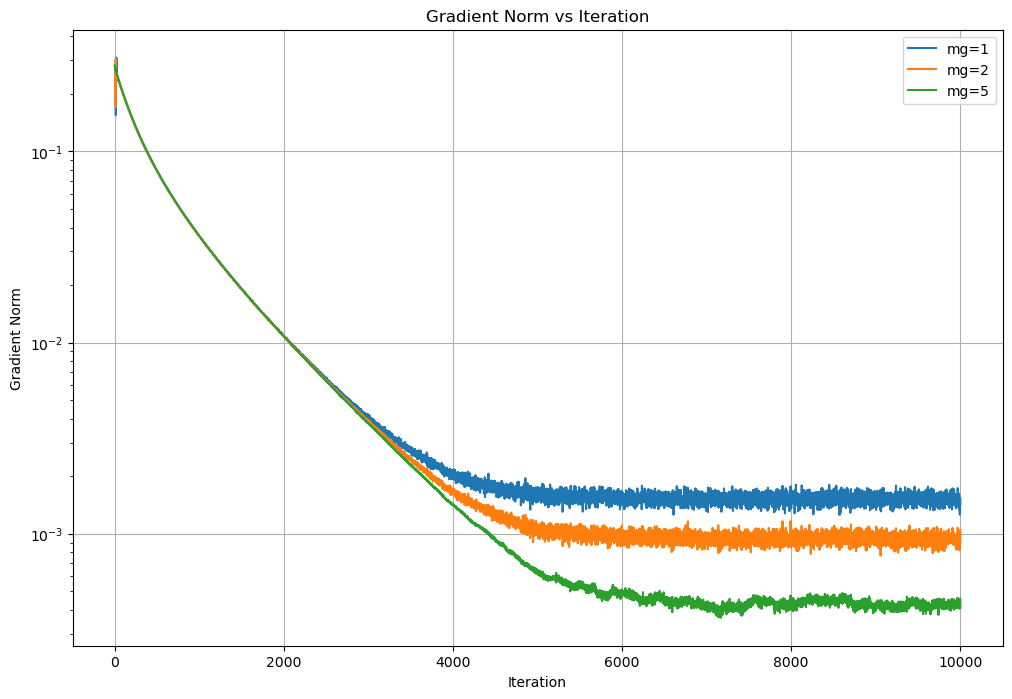

In [177]:
a = "gradient_norm_on_full_trainset"
plt.semilogy(L1_avg[a], label='mg=1')
plt.semilogy(L2_avg[a], label='mg=2')
plt.semilogy(L3_avg[a], label='mg=5')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norm vs Iteration')
plt.grid()
plt.show()

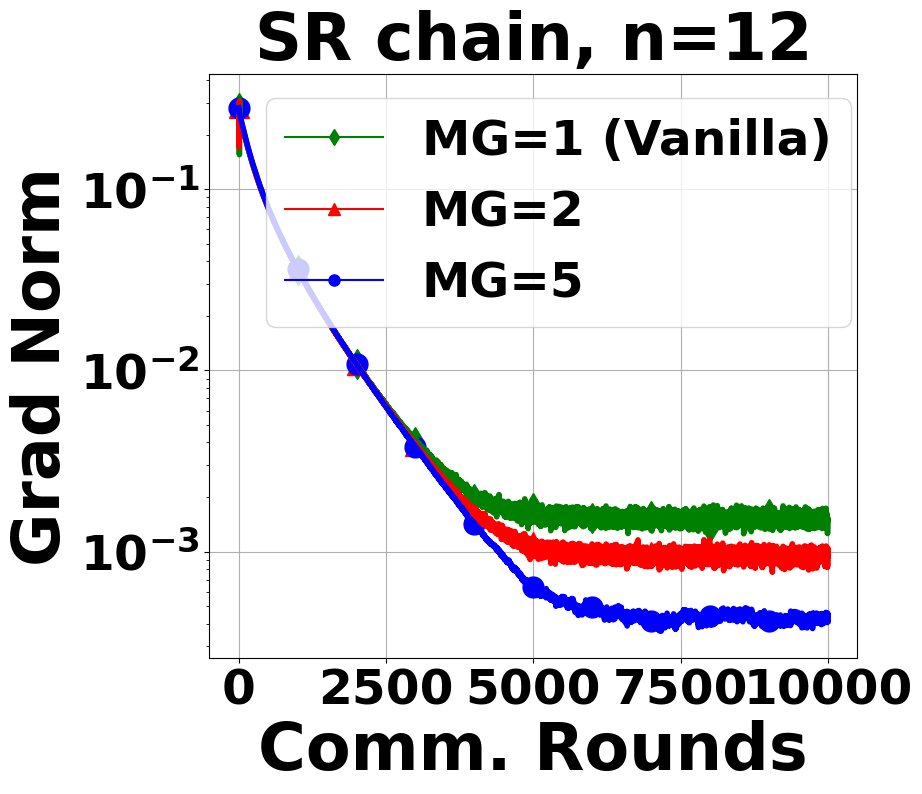

In [184]:
df1 = L1_avg
df2 = L2_avg
df3 = L3_avg

s = 10000

grads = [
    df1["gradient_norm_on_full_trainset"][:s],
    df2["gradient_norm_on_full_trainset"][:s],
    df3["gradient_norm_on_full_trainset"][:s],
    ]
legend = [
    "MG=1 (Vanilla)",
    "MG=2",
    "MG=5",
]

prettyshow(grads, legend, save='/Users/luogan/Code/ICML2025_project/模拟数据/高的kappa下的MG实验/SR_chainn=12, xinmeng_grad_norm,lr=1e-3.pdf', ylabel='Grad Norm')

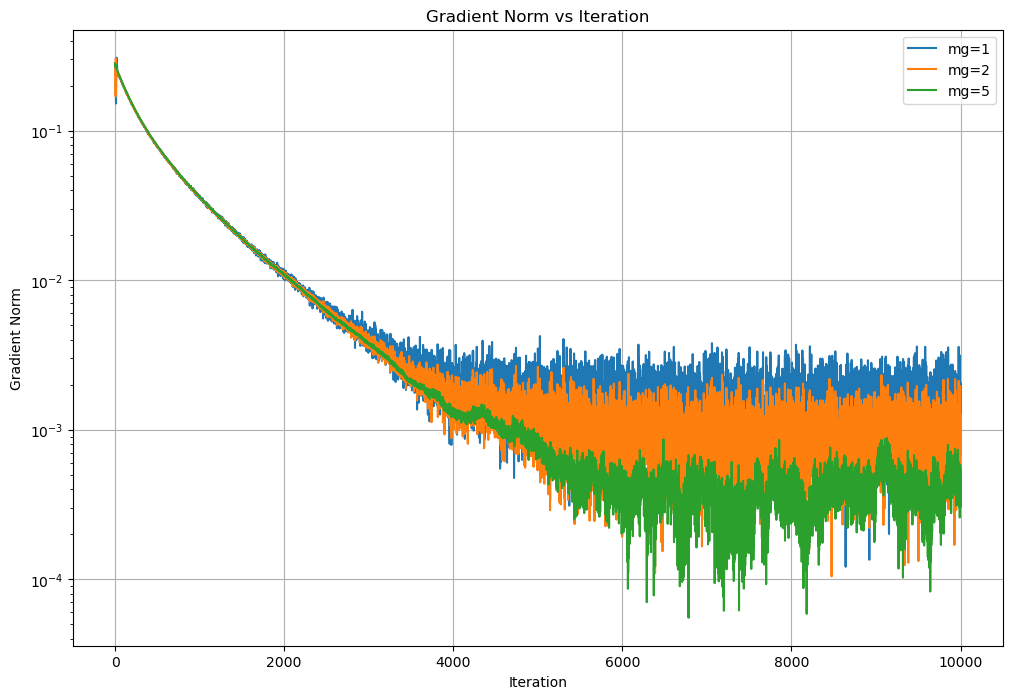

In [173]:
a = "gradient_norm_on_full_trainset"
plt.semilogy(L1[a], label='mg=1')
plt.semilogy(L2[a], label='mg=2')
plt.semilogy(L3[a], label='mg=5')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norm vs Iteration')
plt.grid()
plt.show()

### new
你在第一张图，画vanilla 对n=6,9,12的曲线，用不同学习率
第二张图，画MG=5对n=6,9,12的曲线，用和vanilla对应的学习率

In [192]:
d=4
L_total= 14400
h_global, y_global, x_opt = init_global_data(d=d, L_total=L_total, seed=42)
print("h:",h_global.shape)
print("y:",y_global.shape)

h: (14400, 4)
y: (14400,)


In [196]:
n=12
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=1)
init_x = init_x_func(n=n, d=d, seed=42)
A= get_xinmeng_matrix(n=n).T
k = 1
A = np.linalg.matrix_power(A, k)
show_row(A)
print("h_tilde:",h_tilde.shape,'\n')
L_12 = PullDiag_GT_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=1e-3,
    sigma_n=0,
    max_it=10000,
    batch_size=200,
)



n=12
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=1)
init_x = init_x_func(n=n, d=d, seed=42)
A= get_xinmeng_matrix(n=n).T
k = 5
A = np.linalg.matrix_power(A, k)
show_row(A)
print("h_tilde:",h_tilde.shape,'\n')
L_12_MG_5 = PullDiag_GT_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=1e-3,
    sigma_n=0,
    max_it=10000,
    batch_size=200,
)

A的第二大特征值: 0.33333333333333337
A的beta: 0.7973538908609501
A的spectral gap: 0.2026461091390499
A的kappa: 1024.000000000183
S_A是: 271.16656134112503 

h_tilde: (12, 1200, 4) 

A的第二大特征值: 0.004115226337448563
A的beta: 0.31772344340295555
A的spectral gap: 0.6822765565970444
A的kappa: 1024.0000000000005
S_A是: 80.54043195983277 

h_tilde: (12, 1200, 4) 



In [197]:
n=9
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=1)
init_x = init_x_func(n=n, d=d, seed=42)
A= get_xinmeng_matrix(n=n).T
k = 1
A = np.linalg.matrix_power(A, k)
show_row(A)
print("h_tilde:",h_tilde.shape,'\n')
L_9 = PullDiag_GT_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=1e-3,
    sigma_n=0,
    max_it=10000,
    batch_size=200,
)



n=9
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=1)
init_x = init_x_func(n=n, d=d, seed=42)
A= get_xinmeng_matrix(n=n).T
k = 5
A = np.linalg.matrix_power(A, k)
show_row(A)
print("h_tilde:",h_tilde.shape,'\n')
L_9_MG_5 = PullDiag_GT_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=1e-3,
    sigma_n=0,
    max_it=10000,
    batch_size=200,
)

A的第二大特征值: 0.33333333333333326
A的beta: 0.7911676303896523
A的spectral gap: 0.20883236961034768
A的kappa: 128.00000000000134
S_A是: 168.13572363820916 

h_tilde: (9, 1600, 4) 

A的第二大特征值: 0.004115226337448545
A的beta: 0.2981996932330454
A的spectral gap: 0.7018003067669546
A的kappa: 128.00000000000003
S_A是: 50.031584832546024 

h_tilde: (9, 1600, 4) 



In [198]:
n=6
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=1)
init_x = init_x_func(n=n, d=d, seed=42)
A= get_xinmeng_matrix(n=n).T
k = 1
A = np.linalg.matrix_power(A, k)
show_row(A)
print("h_tilde:",h_tilde.shape,'\n')
L_6 = PullDiag_GT_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=1e-3,
    sigma_n=0,
    max_it=10000,
    batch_size=200,
)



n=6
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=1)
init_x = init_x_func(n=n, d=d, seed=42)
A= get_xinmeng_matrix(n=n).T
k = 5
A = np.linalg.matrix_power(A, k)
show_row(A)
print("h_tilde:",h_tilde.shape,'\n')
L_6_MG_5 = PullDiag_GT_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=1e-3,
    sigma_n=0,
    max_it=10000,
    batch_size=200,
)

A的第二大特征值: 0.33333333333333326
A的beta: 0.7720884859422023
A的spectral gap: 0.22791151405779775
A的kappa: 16.0
S_A是: 81.09215032042978 

h_tilde: (6, 2400, 4) 

A的第二大特征值: 0.9999999999999998
A的beta: 0.22954539179538067
A的spectral gap: 0.7704546082046193
A的kappa: 16.000000000000036
S_A是: 23.988220150697362 

h_tilde: (6, 2400, 4) 



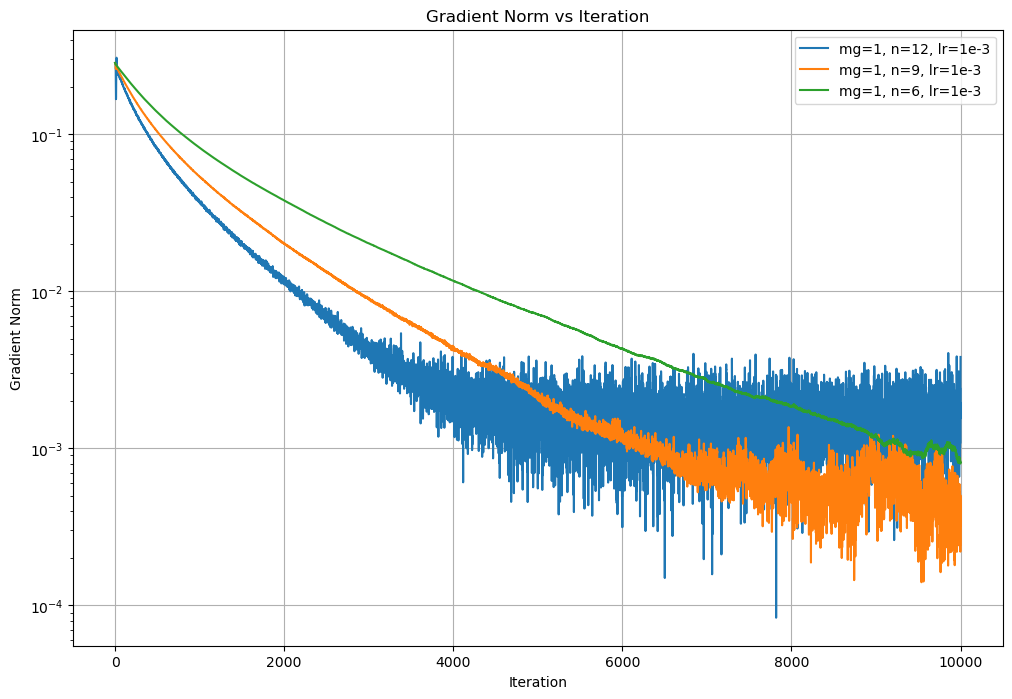

In [200]:
a = "gradient_norm_on_full_trainset"
plt.semilogy(L_12[a], label='mg=1, n=12, lr=1e-3')
plt.semilogy(L_9[a], label='mg=1, n=9, lr=1e-3')
plt.semilogy(L_6[a], label='mg=1, n=6, lr=1e-3')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norm vs Iteration')
plt.grid()
plt.show()

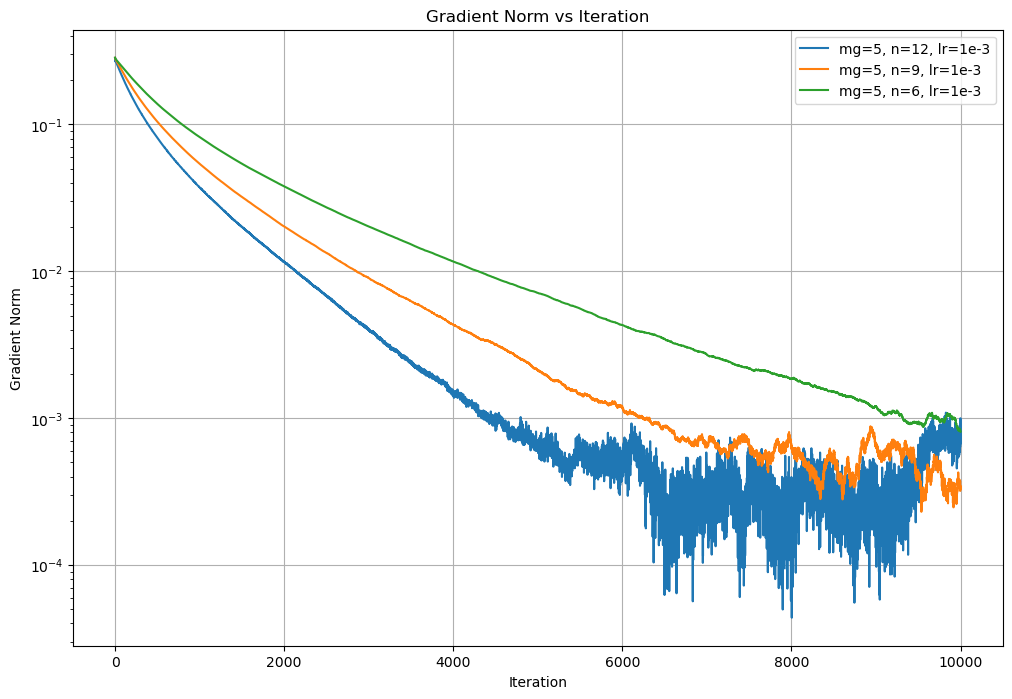

In [201]:
a = "gradient_norm_on_full_trainset"
plt.semilogy(L_12_MG_5[a], label='mg=5, n=12, lr=1e-3')
plt.semilogy(L_9_MG_5[a], label='mg=5, n=9, lr=1e-3')
plt.semilogy(L_6_MG_5[a], label='mg=5, n=6, lr=1e-3')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norm vs Iteration')
plt.grid()
plt.show()

### 比如说xinmeng matrix n=10, 你随机赋予权重, 选kappa小的，中等的，大的

In [231]:
def get_xinmeng_matrix_special(n=10, seed=42):
    M = np.zeros((n, n))

    # 主对角线上的元素
    M[np.diag_indices(n)] = 1 / 3 * np.ones(n)
    M[n - 1, n - 1] = M[n - 1, n - 1] + 1 / 3

    # 次对角线上的元素
    for i in range(n - 1):
        M[i + 1, i] = M[i + 1, i] + 1 / 3

    # 第一行上的元素
    M[0, :] = M[0, :] + 1 / 3

    # For non-zero elements, randomly assign values between 1 and 9
    np.random.seed(seed)
    mask = M != 0
    M[mask] = np.random.randint(1, 8, size=np.sum(mask))

    A = Col(M)

    return A.T

In [233]:
A = get_xinmeng_matrix_special(n=10, seed=9)
show_row(A)

A的第二大特征值: 0.3473397462448564
A的beta: 0.8154579998856134
A的spectral gap: 0.1845420001143866
A的kappa: 9432.500000000373
S_A是: 347.9227339429061 



n = 10

seed = 21, kappa = 29

seed = 0, kappa = 2240

seed = 9, kappa = 9432

In [242]:
d=4
L_total= 8000
h_global, y_global, x_opt = init_global_data(d=d, L_total=L_total, seed=42)
print("h:",h_global.shape)
print("y:",y_global.shape)

h: (8000, 4)
y: (8000,)


In [238]:
n=10
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=1)
init_x = init_x_func(n=n, d=d, seed=42)
A= get_xinmeng_matrix_special(n=n, seed=21)
k = 1
A = np.linalg.matrix_power(A, k)
show_row(A)
print("h_tilde:",h_tilde.shape,'\n')
L_11 = PullDiag_GT_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=1e-3,
    sigma_n=0,
    max_it=10000,
    batch_size=200,
)

n=10
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=1)
init_x = init_x_func(n=n, d=d, seed=42)
A= get_xinmeng_matrix_special(n=n, seed=21)
k = 5
A = np.linalg.matrix_power(A, k)
show_row(A)
print("h_tilde:",h_tilde.shape,'\n')
L_11_MG = PullDiag_GT_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=1e-3,
    sigma_n=0,
    max_it=10000,
    batch_size=200,
)

A的第二大特征值: 0.39129063175632417
A的beta: 0.8587086926675411
A的spectral gap: 0.14129130733245887
A的kappa: 28.734693877551504
S_A是: 195.0797837022329 

h_tilde: (10, 800, 4) 

A的第二大特征值: 0.24404102261143593
A的beta: 0.39464140055351676
A的spectral gap: 0.6053585994464832
A的kappa: 28.734693877551052
S_A是: 45.53181816302655 

h_tilde: (10, 800, 4) 



In [239]:
n=10
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=1)
init_x = init_x_func(n=n, d=d, seed=42)
A= get_xinmeng_matrix_special(n=n, seed=0)
k = 1
A = np.linalg.matrix_power(A, k)
show_row(A)
print("h_tilde:",h_tilde.shape,'\n')
L_22 = PullDiag_GT_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=1e-3,
    sigma_n=0,
    max_it=10000,
    batch_size=200,
)


n=10
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=1)
init_x = init_x_func(n=n, d=d, seed=42)
A= get_xinmeng_matrix_special(n=n, seed=0)
k = 5
A = np.linalg.matrix_power(A, k)
show_row(A)
print("h_tilde:",h_tilde.shape,'\n')
L_22_MG = PullDiag_GT_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=1e-3,
    sigma_n=0,
    max_it=10000,
    batch_size=200,
)

A的第二大特征值: 0.10342259537154619
A的beta: 0.8105370696547244
A的spectral gap: 0.18946293034527562
A的kappa: 2240.228571428456
S_A是: 290.8974445778011 

h_tilde: (10, 800, 4) 

A的第二大特征值: 0.10095271919851659
A的beta: 0.30594711624942944
A的spectral gap: 0.6940528837505706
A的kappa: 2240.228571428571
S_A是: 79.40934123323943 

h_tilde: (10, 800, 4) 



In [240]:
n=10
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=1)
init_x = init_x_func(n=n, d=d, seed=42)
A= get_xinmeng_matrix_special(n=n, seed=9)
k = 1
A = np.linalg.matrix_power(A, k)
show_row(A)
print("h_tilde:",h_tilde.shape,'\n')
L_33 = PullDiag_GT_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=1e-3,
    sigma_n=0,
    max_it=10000,
    batch_size=200,
)


n=10
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=1)
init_x = init_x_func(n=n, d=d, seed=42)
A= get_xinmeng_matrix_special(n=n, seed=9)
k = 5
A = np.linalg.matrix_power(A, k)
show_row(A)
print("h_tilde:",h_tilde.shape,'\n')
L_33_MG = PullDiag_GT_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=1e-3,
    sigma_n=0,
    max_it=10000,
    batch_size=200,
)

A的第二大特征值: 0.3473397462448564
A的beta: 0.8154579998856134
A的spectral gap: 0.1845420001143866
A的kappa: 9432.500000000373
S_A是: 347.9227339429061 

h_tilde: (10, 800, 4) 

A的第二大特征值: 0.07185994824263539
A的beta: 0.22245131215462557
A的spectral gap: 0.7775486878453745
A的kappa: 9432.499999999727
S_A是: 82.5753527859561 

h_tilde: (10, 800, 4) 



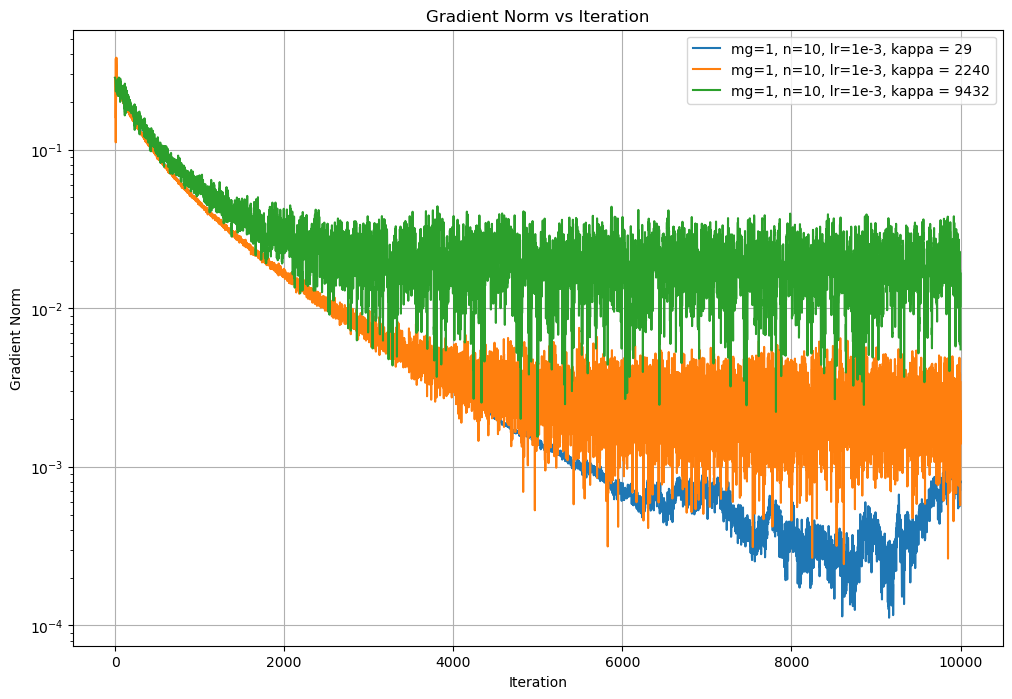

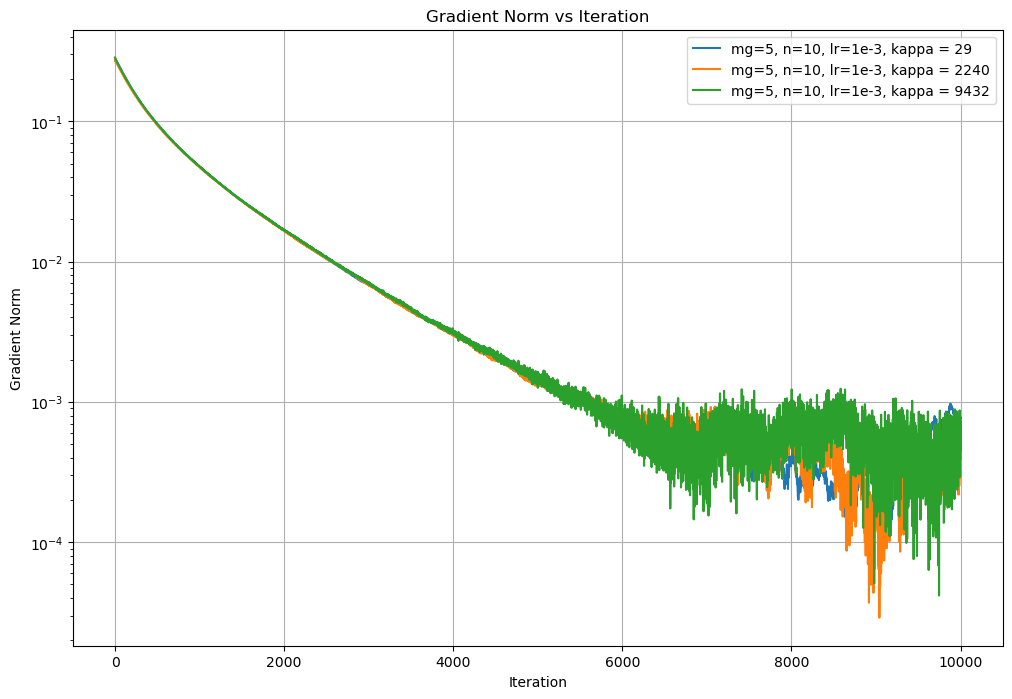

In [241]:
a = "gradient_norm_on_full_trainset"
plt.semilogy(L_11[a], label='mg=1, n=10, lr=1e-3, kappa = 29')
plt.semilogy(L_22[a], label='mg=1, n=10, lr=1e-3, kappa = 2240')
plt.semilogy(L_33[a], label='mg=1, n=10, lr=1e-3, kappa = 9432')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norm vs Iteration')
plt.grid()
plt.show()


a = "gradient_norm_on_full_trainset"
plt.semilogy(L_11_MG[a], label='mg=5, n=10, lr=1e-3, kappa = 29')
plt.semilogy(L_22_MG[a], label='mg=5, n=10, lr=1e-3, kappa = 2240')
plt.semilogy(L_33_MG[a], label='mg=5, n=10, lr=1e-3, kappa = 9432')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norm vs Iteration')
plt.grid()
plt.show()

In [248]:
n=10
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=1)
init_x = init_x_func(n=n, d=d, seed=42)
A= get_xinmeng_matrix_special(n=n, seed=21)
k = 5
A = np.linalg.matrix_power(A, k)
show_row(A)
print("h_tilde:",h_tilde.shape,'\n')

L1_list = []

for i in range(20):

    L_11 = PullDiag_GT_with_batch(
        A=A,
        init_x=init_x,
        h_data=h_tilde,
        y_data=y_tilde,
        grad_func=grad_with_batch,
        rho=1e-2,
        lr=1e-3,
        sigma_n=0,
        max_it=10000,
        batch_size=200,
    )
    L1_list.append(L_11)
    print(i)
L1_avg = pd.DataFrame(
    {col: sum(df[col] for df in L1_list) / len(L1_list) 
     for col in L1_list[0].columns},
    index=L1_list[0].index
)
L1_avg.to_csv('MG=5,low_kappa.csv')

A的第二大特征值: 0.24404102261143593
A的beta: 0.39464140055351676
A的spectral gap: 0.6053585994464832
A的kappa: 28.734693877551052
S_A是: 45.53181816302655 

h_tilde: (10, 800, 4) 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


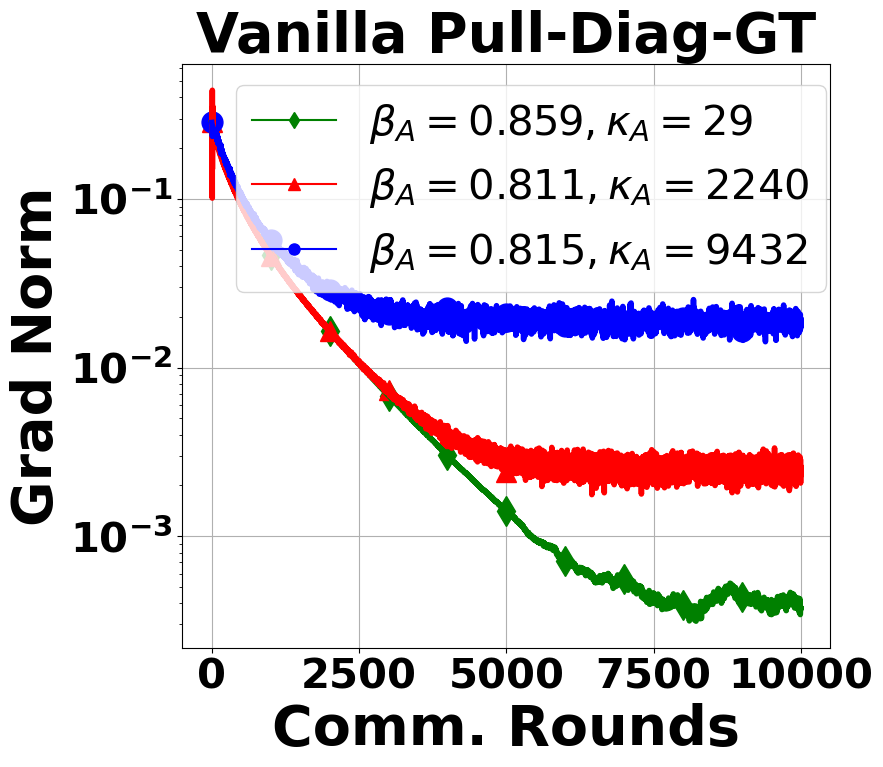

In [276]:
df1 = pd.read_csv("./MG=1,low_kappa.csv")
df2 = pd.read_csv("./MG=1,med_kappa.csv")
df3 = pd.read_csv("./MG=1,high_kappa.csv")

s = 10000

grads = [
    df1["gradient_norm_on_full_trainset"][:s],
    df2["gradient_norm_on_full_trainset"][:s],
    df3["gradient_norm_on_full_trainset"][:s],
    ]
legend = [
    r"$\beta_A=0.859, \kappa_{A}=29$",
    r"$\beta_A=0.811, \kappa_{A}=2240$",
    r"$\beta_A=0.815, \kappa_{A}=9432$",
]

prettyshow(grads, legend, save='/Users/luogan/Code/ICML2025_project/模拟数据/高的kappa下的MG实验/vanilla,n=10,MG=1,yes.pdf', ylabel='Grad Norm')

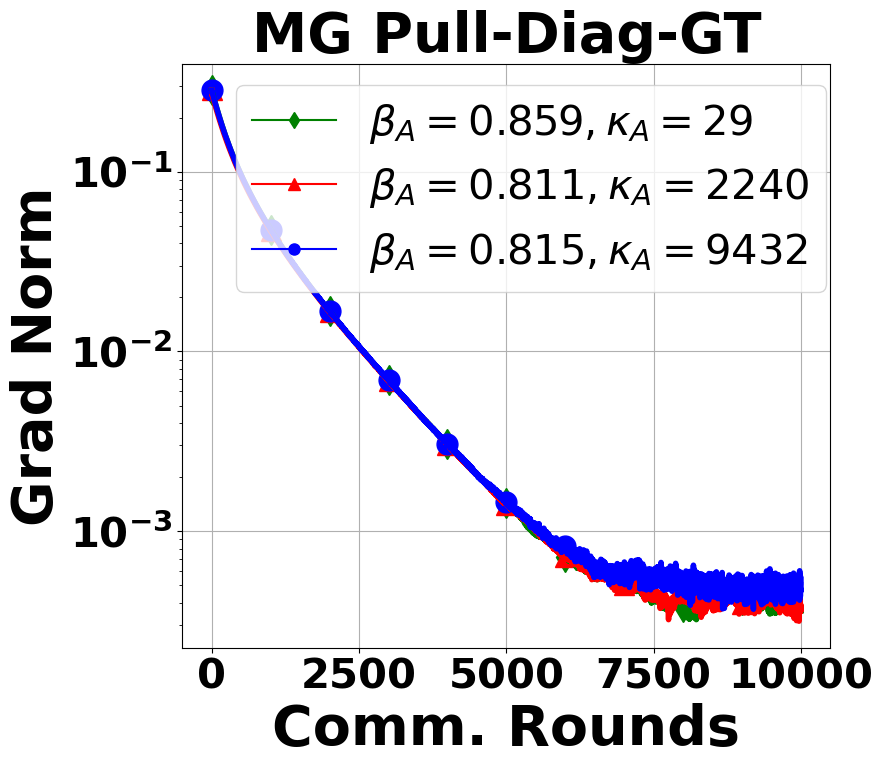

In [281]:
df1 = pd.read_csv("./MG=5,low_kappa.csv")
df2 = pd.read_csv("./MG=5,med_kappa.csv")
df3 = pd.read_csv("./MG=5,high_kappa.csv")

s = 10000

grads = [
    df1["gradient_norm_on_full_trainset"][:s],
    df2["gradient_norm_on_full_trainset"][:s],
    df3["gradient_norm_on_full_trainset"][:s],
    ]
legend = [
    r"$\beta_A=0.859, \kappa_{A}=29$",
    r"$\beta_A=0.811, \kappa_{A}=2240$",
    r"$\beta_A=0.815, \kappa_{A}=9432$",
]

prettyshow(grads, legend, save='/Users/luogan/Code/ICML2025_project/模拟数据/高的kappa下的MG实验/MG,n=10,MG=5,yes.pdf', ylabel='Grad Norm')